In [1]:
# This code analyzes the simulation results in ../outputs/oscillation_multiodors/ folder and plots Supplementary Figure 9.

In [2]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import statistics
import math
from matplotlib.ticker import ScalarFormatter
import numpy as np
import datetime
cmap = plt.get_cmap("tab10")

In [3]:
def readdata(filename):
    f = open(filename,"rb")
    gw0 = pickle.load(f)
    return gw0
folder="../outputs/oscillation_multiodors/"
LN0_normal=readdata(folder+"LN0_normal.txt")
LN1_normal=readdata(folder+"LN1_normal.txt")
LN2_normal=readdata(folder+"LN2_normal.txt")
LN3_normal=readdata(folder+"LN3_normal.txt")
LN_normal=readdata(folder+"LN_normal.txt")
PN_normal=readdata(folder+"PN_normal.txt")
KC_normal=readdata(folder+"KC_normal.txt")
t0_normal=readdata(folder+"t0_normal.txt")

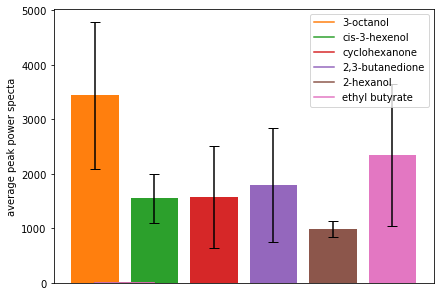

In [4]:
def print_txt(l0,f0):
    with open(f0, "w") as f:
        for item in l0:
            f.write("%s\n" % item)
def print_fft(w,xlim_start,xlim_end):
    l0=w[int(xlim_start*1000):int(xlim_end*1000)]
    N=int(len(l0)/1)
    dt=0.001
    amp = np.abs(np.fft.fft(l0))
    freq = np.fft.fftfreq(N, d=dt)
    power = amp**2
    return freq[1:int(N/2)], power[1:int(N/2)]
def make_fft_fig(ax0,ax1,ax2,gwt0,gw0,gw1,gw2,i):
    f0,a0=print_fft(gw0,1+i*20,9+i*20)
    f1,a1=print_fft(gw0,11+i*20,19+i*20)
    f2,a2=print_fft(gw2,1+i*20,9+i*20)
    f3,a3=print_fft(gw1,1+i*20,9+i*20)
    ax0.plot(f0,list(map(lambda x:x,a0)),color=cmap(0), zorder=0,label="PN")
    ax0.set_xlim(0,80)
    ax0.legend()
    ax0.set_xlabel("Freqency [Hz]")
    ax0.set_ylabel("Power")
    ax0.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax0.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    ax1.plot(f3,list(map(lambda x:x,a3)),color=cmap(1),label="LN")
    ax1.set_xlim(0,80)
    ax1.legend()
    ax1.set_xlabel("Freqency [Hz]")
    ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax1.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    ax2.plot(f2,list(map(lambda x:x,a2)),color=cmap(2), zorder=1,label="KC")
    ax2.set_xlim(0,80)
    ax2.legend()
    ax2.set_xlabel("Freqency [Hz]")
    ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax2.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
def make_fft_fig_peak(ax,gwt0,gw0,gw1,gw2,n):
    c0=np.zeros((5,n))
    for i in range(n):
        f0,a0=print_fft(gw0,1+i*20,9+i*20)        
        f1,a1=print_fft(gw2,1+i*20,9+i*20)
        f2,a2=print_fft(gw1,1+i*20,9+i*20)
        f3,a3=print_fft(gw0,11+i*20,19+i*20)
        c0[0][i]=max(a0)
        c0[2][i]=max(a1)
        c0[1][i]=max(a2)
        c0[3][i]=max(a3)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
    ax.bar(1,np.average(c0[0]),color=cmap(0),label="PN")
    ax.bar(2,np.average(c0[1]),color=cmap(1),label="LN")
    ax.bar(3,np.average(c0[2]),color=cmap(2),label="KC")
    ax.bar(4,np.average(c0[3]),color=cmap(3),label="PN no odor")

    ax.errorbar([1,2,3,4],[np.average(c0[0]),np.average(c0[1]),np.average(c0[2]),np.average(c0[3])], yerr=[statistics.stdev(c0[0]),statistics.pstdev(c0[1]),statistics.stdev(c0[2]),statistics.stdev(c0[3])],fmt='none',ecolor='black',capsize=5)
    ax.legend(loc='upper right')
    ax.set_yscale("log")
    ax.set_xticks([])
    dt_now=str(datetime.datetime.now())
    dt_now=dt_now.replace('.', '-')
    dt_now=dt_now.replace(' ', '-')
    dt_now=dt_now.replace(':', '-')
    plt.savefig("./temp/osci_"+dt_now+".png", format="png", dpi=300)
def make_fft_fig_peak_each_odor(ax0,gwt0,gw0,gw1,gw2,n):
    c0=np.zeros((6,int(n/6)))
    for i in range(n):
        f0,a0=print_fft(gw0,1+i*20,9+i*20)
        c0[i%6][int(i/6)]=max(a0)
        
    ax0.bar("(i)",np.average(c0[0]),color=cmap(1))
    ax0.bar("(ii)",np.average(c0[1]),color=cmap(2))
    ax0.bar("(iii)",np.average(c0[2]),color=cmap(3))
    ax0.bar("(iv)",np.average(c0[3]),color=cmap(4))
    ax0.bar("(v)",np.average(c0[4]),color=cmap(5))
    ax0.bar("(vi)",np.average(c0[5]),color=cmap(6))
    ax0.errorbar(["(i)","(ii)","(iii)","(iv)","(v)","(vi)"],[np.average(c0[0]),np.average(c0[1]),np.average(c0[2]),np.average(c0[3]),np.average(c0[4]),np.average(c0[5])], yerr=[statistics.pstdev(c0[0]),statistics.stdev(c0[1]),statistics.stdev(c0[2]),statistics.stdev(c0[3]),statistics.stdev(c0[4]),statistics.stdev(c0[5])],fmt='none',ecolor='black',capsize=5)
    ax0.set_ylabel("average peak power specta")
    plt.plot([0,0],color=cmap(1),label="3-octanol")
    plt.plot([0,0],color=cmap(2),label="cis-3-hexenol")
    plt.plot([0,0],color=cmap(3),label="cyclohexanone")
    plt.plot([0,0],color=cmap(4),label="2,3-butanedione")
    plt.plot([0,0],color=cmap(5),label="2-hexanol")
    plt.plot([0,0],color=cmap(6),label="ethyl butyrate")
    plt.legend(loc='upper right')
    plt.xticks([])
    plt.savefig("../outputs/figs/oscillations_multiodors_PN.svg", format="svg")
    print_txt(c0[0],"../outputs/FigSourceData/SFig9_0.txt")
    print_txt(c0[1],"../outputs/FigSourceData/SFig9_1.txt")
    print_txt(c0[2],"../outputs/FigSourceData/SFig9_2.txt")
    print_txt(c0[3],"../outputs/FigSourceData/SFig9_3.txt")
    print_txt(c0[4],"../outputs/FigSourceData/SFig9_4.txt")
    print_txt(c0[5],"../outputs/FigSourceData/SFig9_5.txt")
        
fig = plt.figure(constrained_layout=True, figsize=(6,4))
ax0 = fig.add_subplot(1, 1, 1)

make_fft_fig_peak_each_odor(ax0, t0_normal, PN_normal, LN_normal, KC_normal,6*5)